In [39]:
import pandas as pd

from steam import Steam
from decouple import config

In [61]:
import json

with open('G:\Meu Drive\Data Science\Medium\Steam Web Scraping\Data\Indie games.json', 'r', encoding = 'utf8') as file:
    data = json.load(file)

# Acessar a estrutura do JSON
applist = data.get('applist', {})
apps = applist.get('apps', [])

# Criar uma lista para armazenar os dados dos aplicativos
app_data = []

# Iterar sobre os aplicativos e coletar os dados
for app in apps:
    appid = app.get('appid', None)
    name = app.get('name', None)
    app_data.append({'AppID': appid, 'Name': name})

# Criar um DataFrame do Pandas
df = pd.DataFrame(app_data)

# Exibir o DataFrame
print(df)


          AppID                             Name
0       1383152                                 
1       1897482                                 
2       2112761                                 
3       1829051                                 
4       1983382                                 
...         ...                              ...
175400  1048250  Bowlbo: The Quest for Bing Bing
175401   884640                  Mines and Magic
175402  1917100                       Zofia Demo
175403  2356920                        BROWN BOB
175404   652770                            Zofia

[175405 rows x 2 columns]


In [1]:
import requests

def get_game_details(app_id):
    url = f'https://store.steampowered.com/api/appdetails?appids={app_id}'

    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if str(app_id) in data and data[str(app_id)]['success']:
                app_name = data[str(app_id)]['data']['name']
                return app_name
            else:
                return None
        else:
            print(f"Error in request: {response.status_code}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error in request: {e}")
        return None

# Define the range of app IDs you want to retrieve (e.g., from 1 to 1000)
start_app_id = 1
end_app_id = 1000

# Store the app IDs and names in a dictionary
app_ids_names = {}

for app_id in range(start_app_id, end_app_id + 1):
    app_name = get_game_details(app_id)
    if app_name:
        app_ids_names[app_id] = app_name

# Display the app IDs and names
for app_id, app_name in app_ids_names.items():
    print(f"App ID: {app_id}, App Name: {app_name}")


KeyboardInterrupt: 

In [62]:
df

,AppID,Name
0,1383152,
1,1897482,
2,2112761,
3,1829051,
4,1983382,
...,...,...
175400,1048250,Bowlbo: The Quest for Bing Bing
175401,884640,Mines and Magic
175402,1917100,Zofia Demo
175403,2356920,BROWN BOB


In [6]:
KEY = config("STEAM_API_KEY")
steam = Steam(KEY)

In [11]:
print(steam)

In [119]:
game_id = 1048250

user = steam.apps.get_app_details(game_id, country = "BR", filters = "name,genres,price_overview")

user

{'1048250': {'success': True,
  'data': {'genres': [{'id': '1', 'description': 'Action'},
    {'id': '25', 'description': 'Adventure'},
    {'id': '23', 'description': 'Indie'}]}}}

In [123]:
import requests

def get_app_details(app_id):
    # Endpoint URL for getting app details
    url = f'https://store.steampowered.com/api/appdetails?appids={app_id}'

    # Making the API request
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if str(app_id) in data and data[str(app_id)]['success']:
            return data[str(app_id)]['data']
        else:
            print(f"AppID {app_id} not found or not successful.")
    else:
        print(f"Error in request: {response.status_code}")

# Example usage to get app information for Dota 2 (AppID 570)
app_id = 1048250
app_details = get_app_details(app_id)

In [141]:
import requests

def get_steam_game_price(app_id, api_key):
    url = f'https://store.steampowered.com/api/appdetails?appids={app_id}&cc=br&currency=BRL'

    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if str(app_id) in data and data[str(app_id)]['success']:
                price_overview = data[str(app_id)]['data'].get('price_overview', {})
                if price_overview:
                    final_price = price_overview.get('final_formatted', 'N/A')
                    return final_price
                else:
                    return 'Preço não disponível'
            else:
                return 'Jogo não encontrado ou sem sucesso.'
        else:
            print(f"Erro na requisição: {response.status_code}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")
        return None

# Exemplo de uso para obter o preço do Dota 2 (AppID 570) no Brasil
app_id = 105600
steam_api_key = 'YOUR_STEAM_API_KEY'  # Substitua pelo sua chave de API da Steam
price_br = get_steam_game_price(app_id, steam_api_key)

# Exibindo o preço do jogo no Brasil
if price_br is not None:
    print(f"Preço do jogo no Brasil: {price_br}")
else:
    print("Não foi possível obter o preço.")


Preço do jogo no Brasil: R$ 19,99


In [142]:
import requests
from bs4 import BeautifulSoup

def get_steam_game_release_date(app_id):
    # URL para a página do jogo na Steam
    url = f'https://store.steampowered.com/app/{app_id}'

    # Envie uma solicitação GET para a URL
    response = requests.get(url)

    if response.status_code == 200:
        # Analise o conteúdo HTML usando Beautiful Soup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Encontre o elemento que contém a data de lançamento
        release_date_element = soup.find('div', {'class': 'release_date'})

        if release_date_element:
            # A data de lançamento geralmente está no formato "Released: [data]"
            # Vamos separar a data a partir da string
            release_date_text = release_date_element.text.strip()
            release_date = release_date_text.replace('Released:', '').strip()
            return release_date
        else:
            return 'Data de lançamento não encontrada'

    else:
        return f"Erro na requisição: {response.status_code}"

# Exemplo de uso para obter a data de lançamento do Dota 2 (AppID 570)
app_id = 105600
release_date = get_steam_game_release_date(app_id)
print(f"Data de lançamento para AppID {app_id}: {release_date}")


Data de lançamento para AppID 105600: Release Date:
16 May, 2011


In [146]:
import requests

def get_steam_game_reviews(app_id, api_key):
    url = f"https://store.steampowered.com/appreviews/{app_id}?json=1&num_per_page=1&key={api_key}&language=all"

    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if 'query_summary' in data:
                query_summary = data['query_summary']
                positive_reviews = query_summary.get('total_positive', 0)
                negative_reviews = query_summary.get('total_negative', 0)
                return positive_reviews, negative_reviews
            else:
                return None, None
        else:
            print(f"Erro na requisição: {response.status_code}")
            return None, None
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")
        return None, None

# Exemplo de uso para obter as análises do Dota 2 (AppID 570)
app_id = 105600
steam_api_key = 'STEAM_API_KEY'  # Substitua pelo sua chave de API da Steam
positive_reviews, negative_reviews = get_steam_game_reviews(app_id, steam_api_key)

# Exibindo a quantidade de análises positivas e negativas
if positive_reviews is not None and negative_reviews is not None:
    print(f"Quantidade de análises positivas: {positive_reviews}")
    print(f"Quantidade de análises negativas: {negative_reviews}")
else:
    print("Não foi possível obter as informações de análises.")


Quantidade de análises positivas: 928744
Quantidade de análises negativas: 20483


In [159]:
import requests

def get_steam_game_info(app_id, api_key):
    # Endpoint para obter detalhes do jogo
    details_url = f'https://store.steampowered.com/api/appdetails?appids={app_id}&cc=us&key={api_key}'

    # Endpoint para obter preços do jogo
    prices_url = f'https://store.steampowered.com/api/app/{app_id}/prices/?cc=us'

    # Endpoint para obter avaliações do jogo
    reviews_url = f'https://store.steampowered.com/appreviews/{app_id}?json=1&num_per_page=0&key={api_key}'

    try:
        # Obter detalhes do jogo
        response_details = requests.get(details_url)
        details_data = response_details.json()
        details = details_data[str(app_id)]['data'] if str(app_id) in details_data and details_data[str(app_id)]['success'] else None

        # Obter preços do jogo
        response_prices = requests.get(prices_url)
        prices_data = response_prices.json()
        prices = prices_data[str(app_id)]['prices'] if str(app_id) in prices_data else None

        # Obter avaliações do jogo
        response_reviews = requests.get(reviews_url)
        reviews_data = response_reviews.json()
        reviews = reviews_data['query_summary'] if 'query_summary' in reviews_data else None

        return details, prices, reviews
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")
        return None, None, None

# Exemplo de uso para obter informações de um jogo (AppID 570 - Dota 2)
app_id = 570
steam_api_key = 'YOUR_STEAM_API_KEY'  # Substitua pela sua chave de API da Steam
details, prices, reviews = get_steam_game_info(app_id, steam_api_key)

# Exibindo as informações obtidas
print("Detalhes do Jogo:")
print(details)

print("\nPreços do Jogo:")
print(prices)

print("\nAvaliações do Jogo:")
print(reviews)


Detalhes do Jogo:
{'type': 'game', 'name': 'Dota 2', 'steam_appid': 570, 'required_age': 0, 'is_free': True, 'dlc': [1241930, 652720], 'detailed_description': "<strong>The most-played game on Steam.</strong><br>Every day, millions of players worldwide enter battle as one of over a hundred Dota heroes. And no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has truly taken on a life of its own.<br><br><strong>One Battlefield. Infinite Possibilities.</strong><br>When it comes to diversity of heroes, abilities, and powerful items, Dota boasts an endless array—no two games are the same. Any hero can fill multiple roles, and there's an abundance of items to help meet the needs of each game. Dota doesn't provide limitations on how to play, it empowers you to express your own style.<br><br><strong>All heroes are free.</strong><br>Competitive balance is Do

In [148]:
import requests

def get_steam_game_review_info(app_id, api_key):
    url = f'https://store.steampowered.com/appreviews/{app_id}?json=1&filter=recent&language=all&review_type=all&purchase_type=all&day_range=9223372036854775807&num_per_page=0&key={api_key}'

    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if 'query_summary' in data:
                query_summary = data['query_summary']
                total_reviews = query_summary.get('total_reviews', 0)
                total_positive_reviews = query_summary.get('total_positive', 0)
                total_negative_reviews = query_summary.get('total_negative', 0)
                total_neutral_reviews = total_reviews - (total_positive_reviews + total_negative_reviews)
                return total_reviews, total_positive_reviews, total_negative_reviews, total_neutral_reviews
            else:
                return None, None, None, None
        else:
            print(f"Erro na requisição: {response.status_code}")
            return None, None, None, None
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")
        return None, None, None, None

# Exemplo de uso para obter as informações de análises do Dota 2 (AppID 570)
app_id = 570
steam_api_key = 'YOUR_STEAM_API_KEY'  # Substitua pelo sua chave de API da Steam
total_reviews, total_positive, total_negative, total_neutral = get_steam_game_review_info(app_id, steam_api_key)

# Exibindo as informações de análises
if total_reviews is not None:
    print(f"Total de análises: {total_reviews}")
    print(f"Análises Positivas: {total_positive}")
    print(f"Análises Negativas: {total_negative}")
    print(f"Análises Neutras: {total_neutral}")
else:
    print("Não foi possível obter as informações de análises.")


Total de análises: 2055880
Análises Positivas: 1690333
Análises Negativas: 365547
Análises Neutras: 0


Documentação da API: https://partner.steamgames.com/doc/webapi/ISteamApps

https://steamapis.com/docs/market#stats

http://api.steampowered.com/ISteamApps/GetAppList/v0002/

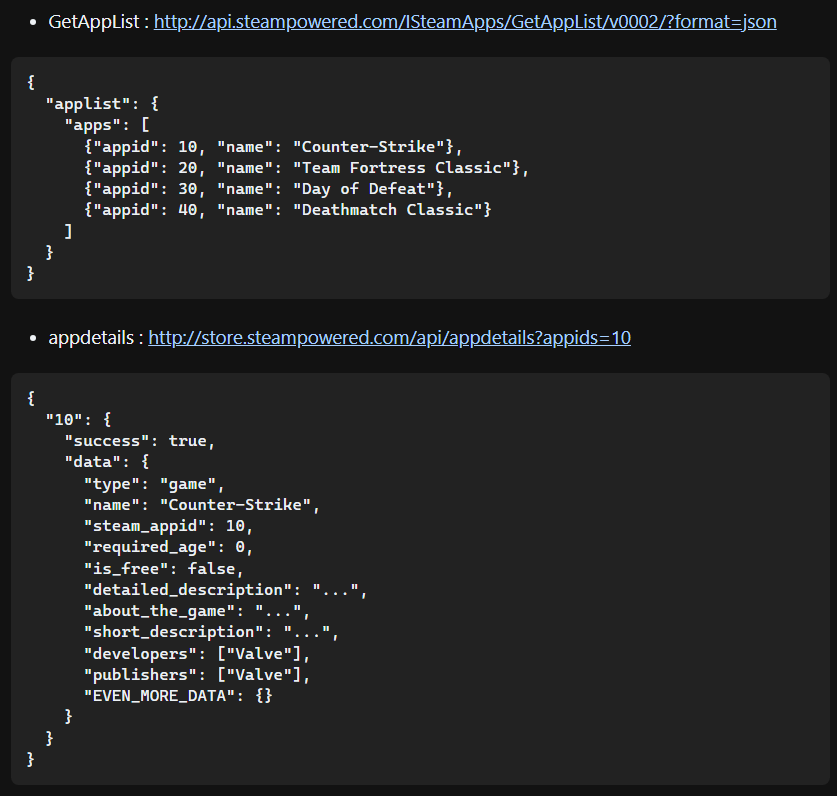

http://api.steampowered.com/ISteamApps/GetAppList/v0002/?tag=Casual&tag=Indie

Tags disponíveis na steam
https://partner.steamgames.com/doc/store/tags